In [ ]:
import zipfile
import os

# Define the paths to the ZIP files
zip_files = ['/content/augmented_images(red vented bulbul).zip', '/content/augmented_images(white throated kingfisher).zip', '/content/augmented_images.zip']
extract_to = 'extracted_bird_images'

# Create a directory to store extracted images if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract each ZIP file
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        folder_name = os.path.splitext(os.path.basename(zip_file))[0]  # Use the ZIP file name as the folder name
        target_folder = os.path.join(extract_to, folder_name)

        if not os.path.exists(target_folder):
            os.makedirs(target_folder)

        zip_ref.extractall(target_folder)
        print(f"Extracted {zip_file} to {target_folder}")

# List the extracted folders
extracted_folders = os.listdir(extract_to)
print("Extracted folders:", extracted_folders)


Extracted /content/augmented_images(red vented bulbul).zip to extracted_bird_images/augmented_images(red vented bulbul)
Extracted /content/augmented_images(white throated kingfisher).zip to extracted_bird_images/augmented_images(white throated kingfisher)
Extracted /content/augmented_images.zip to extracted_bird_images/augmented_images
Extracted folders: ['augmented_images(red vented bulbul)', 'augmented_images(white throated kingfisher)', 'augmented_images']


Visualizing samples for folder: augmented_images(red vented bulbul)


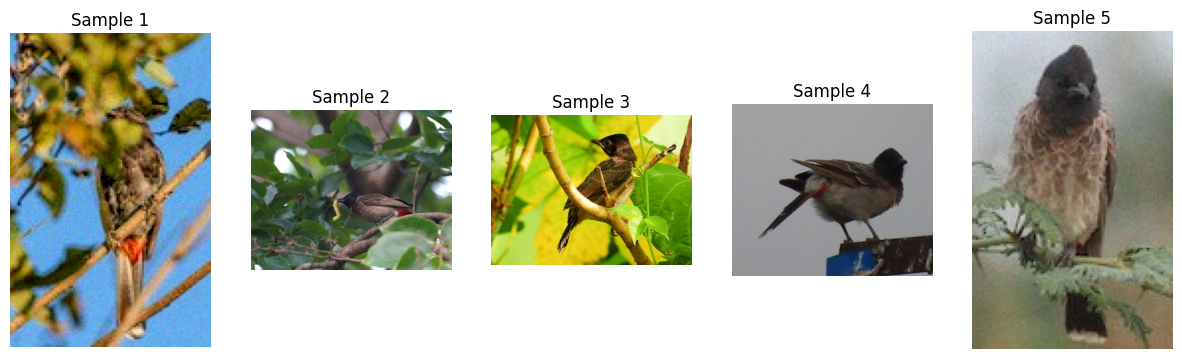

Visualizing samples for folder: augmented_images(white throated kingfisher)


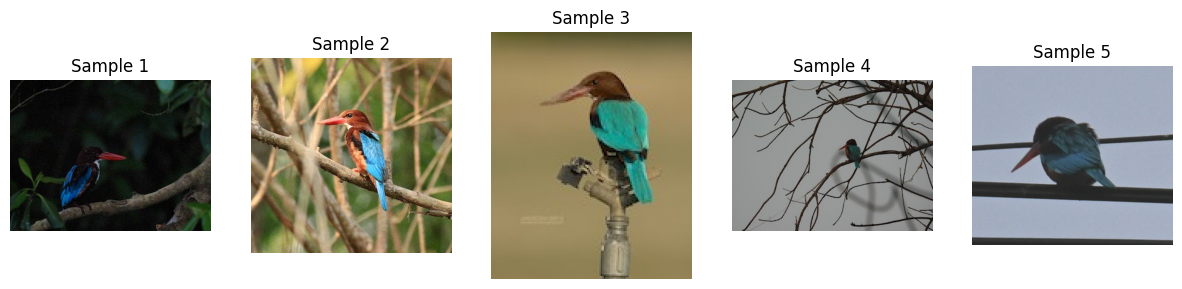

Visualizing samples for folder: augmented_images


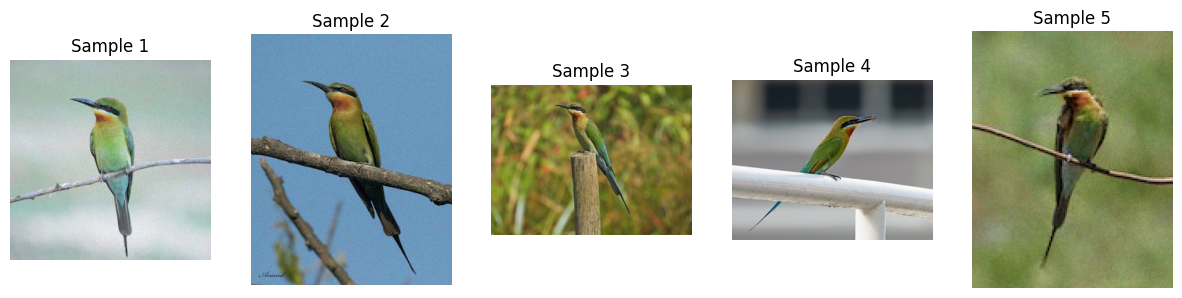

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Function to visualize sample images
def visualize_samples(folder_path, num_samples=5):
    sample_images = os.listdir(folder_path)[:num_samples]

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images):
        img = cv2.imread(os.path.join(folder_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"Sample {i+1}")
        plt.axis('off')

    plt.show()

# Display samples from each extracted bird folder
for folder in extracted_folders:
    folder_path = os.path.join(extract_to, folder)
    print(f"Visualizing samples for folder: {folder}")
    visualize_samples(folder_path)


Color analysis for folder: augmented_images(red vented bulbul)


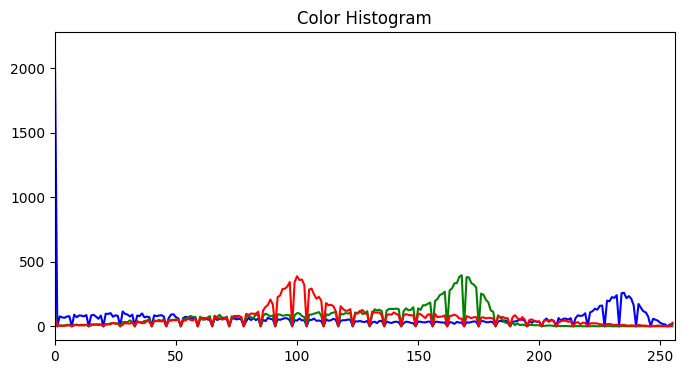

Color analysis for folder: augmented_images(white throated kingfisher)


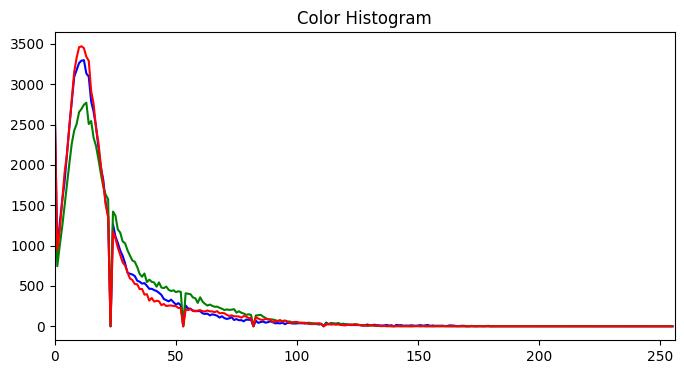

Color analysis for folder: augmented_images


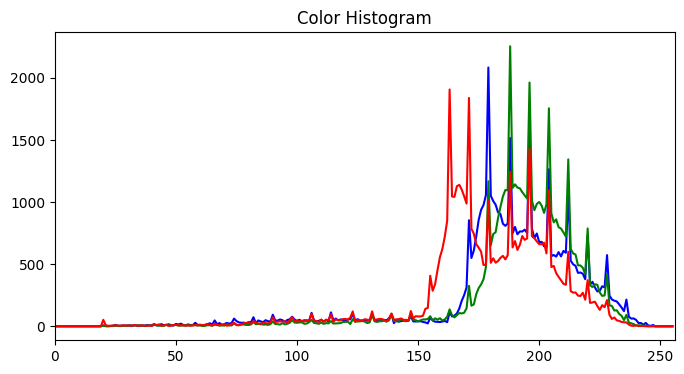

In [ ]:
import numpy as np

# Function to plot color histograms
def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    color = ('b', 'g', 'r')
    plt.figure(figsize=(8, 4))

    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.title('Color Histogram')
    plt.show()

# Test color histogram on a sample image from each folder
for folder in extracted_folders:
    sample_img = os.listdir(os.path.join(extract_to, folder))[0]
    print(f"Color analysis for folder: {folder}")
    plot_color_histogram(os.path.join(extract_to, folder, sample_img))


Edge analysis for folder: augmented_images(red vented bulbul)


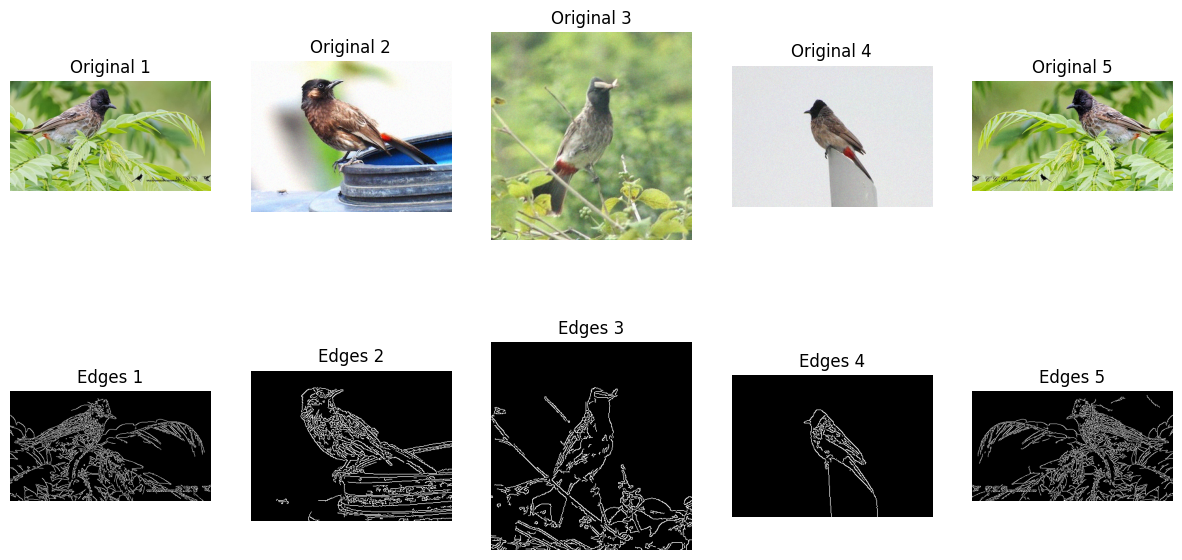

Edge analysis for folder: augmented_images(white throated kingfisher)


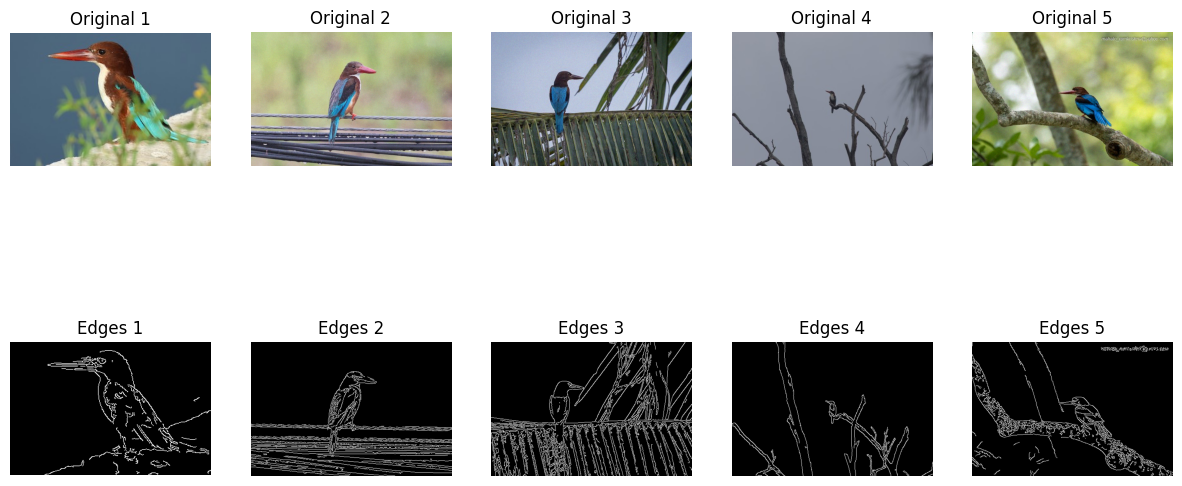

Edge analysis for folder: augmented_images


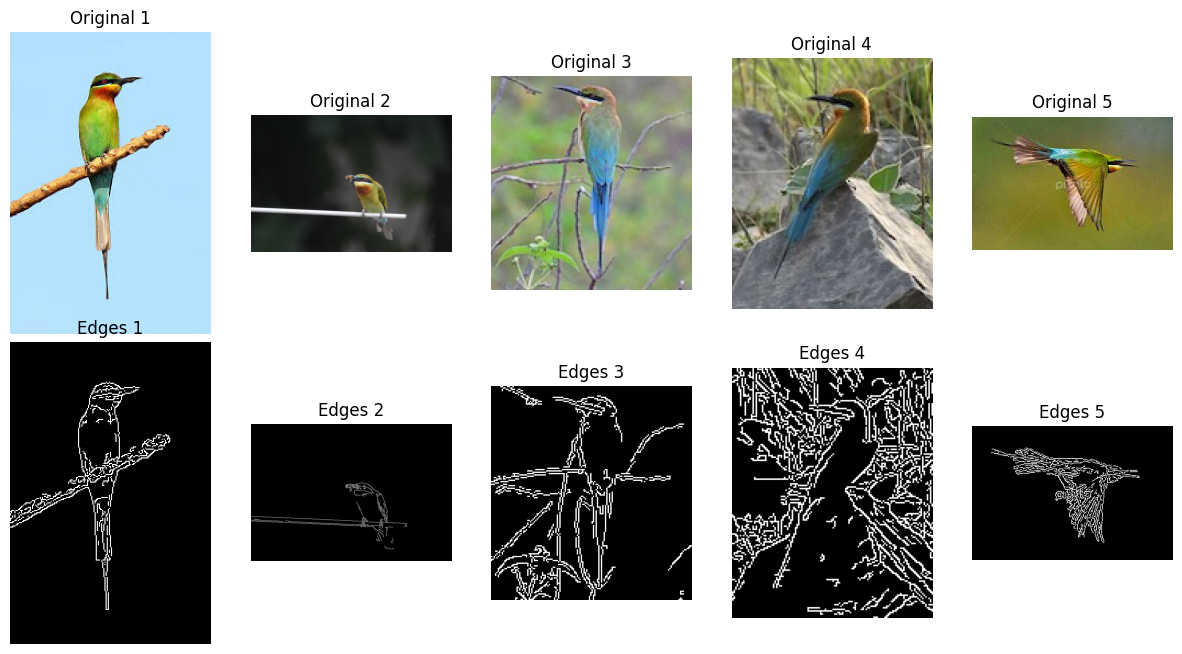

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def edge_detection(image_path):
    img = cv2.imread(image_path)  # Read the image in color (BGR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for edge detection
    edges = cv2.Canny(gray, 100, 200)  # Canny edge detection
    return edges, img  # Return both the edges and the original image

def plot_edge_detection_for_class(folder_path, num_samples=5):
    all_images = os.listdir(folder_path)
    sample_images = random.sample(all_images, min(num_samples, len(all_images)))  # Select random images

    plt.figure(figsize=(15, 8))  # Adjust the figure size to better fit the images
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        edges, original_img = edge_detection(img_path)

        # Plot the original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.title(f"Original {i+1}")
        plt.axis('off')

        # Plot the edge-detected image
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Edges {i+1}")
        plt.axis('off')

    # Reduce space between the rows
    plt.subplots_adjust(hspace=0.01)  # You can adjust this value to change the space

    plt.show()

# Loop through each folder and perform edge detection on random 5 sample images
for folder in extracted_folders:
    folder_path = os.path.join(extract_to, folder)
    print(f"Edge analysis for folder: {folder}")
    plot_edge_detection_for_class(folder_path, num_samples=5)


Contour analysis for folder: augmented_images(red vented bulbul)


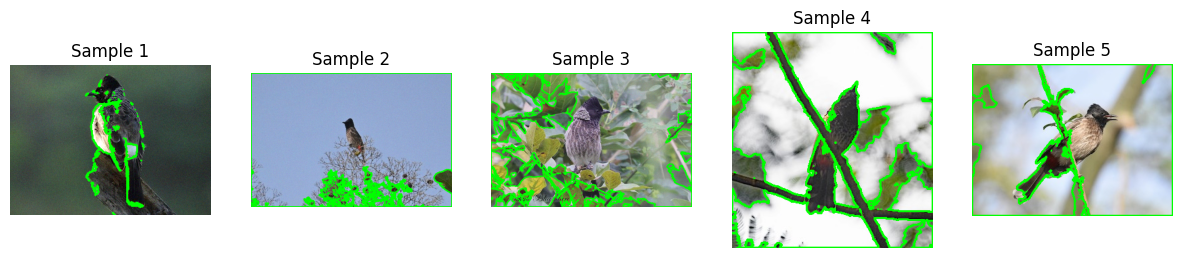

Contour analysis for folder: augmented_images(white throated kingfisher)


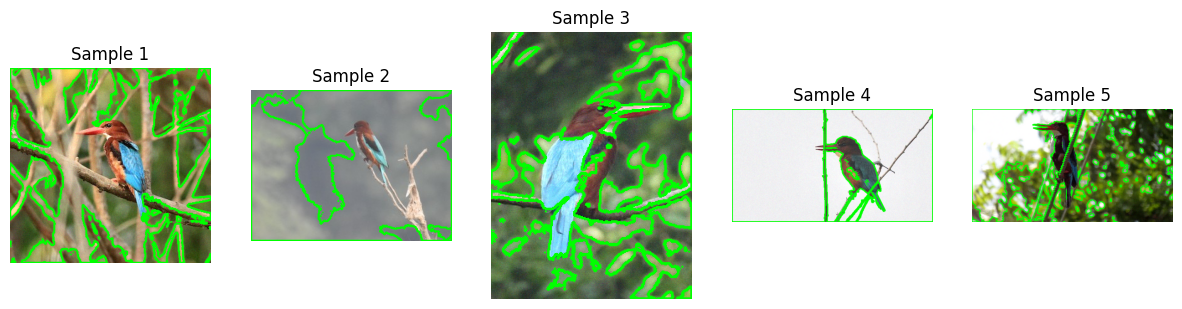

Contour analysis for folder: augmented_images


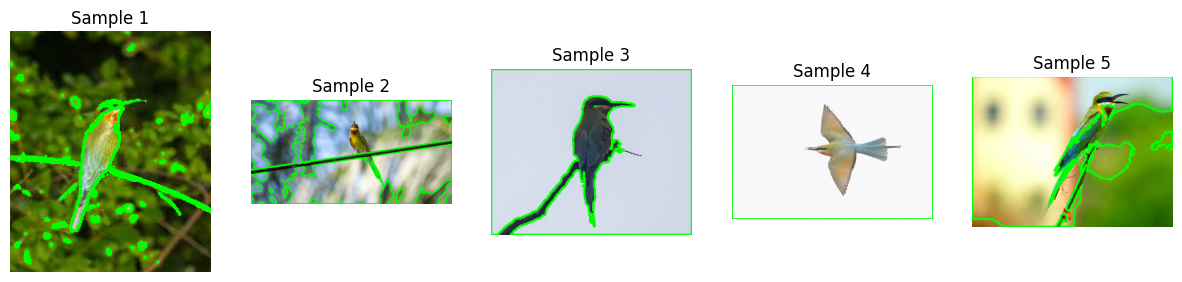

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import random

def find_contours(image_path):
    img = cv2.imread(image_path)  # Read the image in color (BGR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for contour detection
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours in green on the original color image
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)  # Green color for contours

    return img

def plot_contours_for_class(folder_path, num_samples=5):
    sample_images = os.listdir(folder_path)

    # Randomly select 5 images from the folder
    random_samples = random.sample(sample_images, num_samples)

    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(random_samples):
        img_path = os.path.join(folder_path, img_name)
        contours_img = find_contours(img_path)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(contours_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.title(f"Sample {i+1}")
        plt.axis('off')

    plt.show()

# Loop through each folder and perform contour detection on 5 randomly selected images
for folder in extracted_folders:
    folder_path = os.path.join(extract_to, folder)
    print(f"Contour analysis for folder: {folder}")
    plot_contours_for_class(folder_path, num_samples=5)
